<a href="https://colab.research.google.com/github/LuisaPolicarpo/Project3/blob/main/luisa_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
#import sqlalchemy as sql
import datetime

from PIL import Image 

import pickle

# !pip install -q streamlit

In [2]:
col_list = ['nconst','primaryName','primaryProfession']
name_b = pd.read_csv('https://datasets.imdbws.com/name.basics.tsv.gz', compression = 'gzip', sep = '\t', usecols=col_list)

In [3]:
col_list2 = ['tconst','nconst']
title_p = pd.read_csv('https://datasets.imdbws.com/title.principals.tsv.gz', compression = 'gzip', sep = '\t', usecols=col_list2)

In [4]:
top_movies= pd.merge(title_p, name_b, how='inner', on=['nconst', 'nconst'])

In [5]:
top_movies.to_pickle('/content/tmg.pickle')

In [2]:
top_movies5 = pd.read_pickle("/content/tmg.pickle")

In [3]:
col_list3 = ['tconst','averageRating','numVotes']
title_ratings = pd.read_csv('https://datasets.imdbws.com/title.ratings.tsv.gz', compression = 'gzip', sep = '\t', usecols=col_list3)

In [4]:
top_movies2= pd.merge(top_movies5, title_ratings, how='inner', on=['tconst', 'tconst'])

In [5]:
top_movies2.to_pickle('/content/tmg4.pickle')

In [6]:
top_movies = pd.read_pickle("/content/tmg4.pickle")

In [7]:
top_movies['wheighted'] = (top_movies['averageRating']*top_movies['numVotes'])/top_movies['numVotes'].sum()
top_movies.sort_values(by=('wheighted'), ascending=False).head(10)

,tconst,nconst,primaryName,primaryProfession,averageRating,numVotes,wheighted
1203141,tt0111161,nm0555550,Niki Marvin,"producer,director,writer",9.3,2658388,0.001931
1203140,tt0111161,nm0006669,William Sadler,"actor,soundtrack,producer",9.3,2658388,0.001931
1203134,tt0111161,nm0000175,Stephen King,"writer,producer,actor",9.3,2658388,0.001931
1203133,tt0111161,nm0000151,Morgan Freeman,"actor,producer,soundtrack",9.3,2658388,0.001931
1203132,tt0111161,nm0005683,Roger Deakins,"cinematographer,camera_department,miscellaneous",9.3,2658388,0.001931
1203139,tt0111161,nm0000209,Tim Robbins,"actor,producer,director",9.3,2658388,0.001931
1203138,tt0111161,nm0002353,Thomas Newman,"music_department,composer,soundtrack",9.3,2658388,0.001931
1203135,tt0111161,nm0290358,Richard Francis-Bruce,"editor,editorial_department,sound_department",9.3,2658388,0.001931
1203136,tt0111161,nm0348409,Bob Gunton,"actor,soundtrack",9.3,2658388,0.001931
1203137,tt0111161,nm0001104,Frank Darabont,"writer,producer,director",9.3,2658388,0.001931


In [9]:
col_list5 = ['tconst','titleType','startYear']
title_basics = pd.read_csv('https://datasets.imdbws.com/title.basics.tsv.gz', compression = 'gzip', sep = '\t', usecols=col_list5)

In [10]:
top_movies2= pd.merge(top_movies, title_basics, how='inner', on=['tconst', 'tconst'])

In [11]:
top_movies2.to_pickle('/content/tmg6.pickle')

In [2]:
top_movies = pd.read_pickle("/content/tmg6.pickle")

In [3]:
top_movies["primaryProfession"] = top_movies.primaryProfession.str.split(',')
top_movies_split = top_movies.explode("primaryProfession")

In [9]:
top_movies_split.head()

,tconst,nconst,primaryName,primaryProfession,averageRating,numVotes,wheighted,titleType,startYear
0,tt0000001,nm1588970,Carmencita,soundtrack,5.7,1922,8.555826e-07,short,1894
1,tt0000001,nm0005690,William K.L. Dickson,cinematographer,5.7,1922,8.555826e-07,short,1894
1,tt0000001,nm0005690,William K.L. Dickson,director,5.7,1922,8.555826e-07,short,1894
1,tt0000001,nm0005690,William K.L. Dickson,producer,5.7,1922,8.555826e-07,short,1894
2,tt0000001,nm0374658,William Heise,cinematographer,5.7,1922,8.555826e-07,short,1894


In [7]:
# condition_ms = top_movies_split.loc[((top_movies_split['titleType'] == 'movie') | (top_movies_split['titleType'] =='short')) & (top_movies_split['startYear'] <= '2022')]

In [31]:
condition = top_movies_split['primaryProfession'] == 'actor'

actors = top_movies_split[condition][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession','titleType','startYear']]

condition2 = actors['titleType'] == 'movie'
condition3 = actors['titleType'] == 'short'
condition4 = actors['startYear'] <= '2022'
actors_ms = actors[condition2 | condition3 & condition4][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession','titleType','startYear']]

In [32]:
condition2 = actors_ms['wheighted'] > actors_ms["wheighted"].mean()

t_actors = actors_ms[condition2][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession','titleType']]

In [33]:
actorst = t_actors.groupby('primaryName')['tconst'].count().reset_index(name='count_actors_movie') 
tp = actorst.sort_values(by=('count_actors_movie'), ascending=False)

top = actorst.sort_values(by=('count_actors_movie'), ascending=False).head(10)

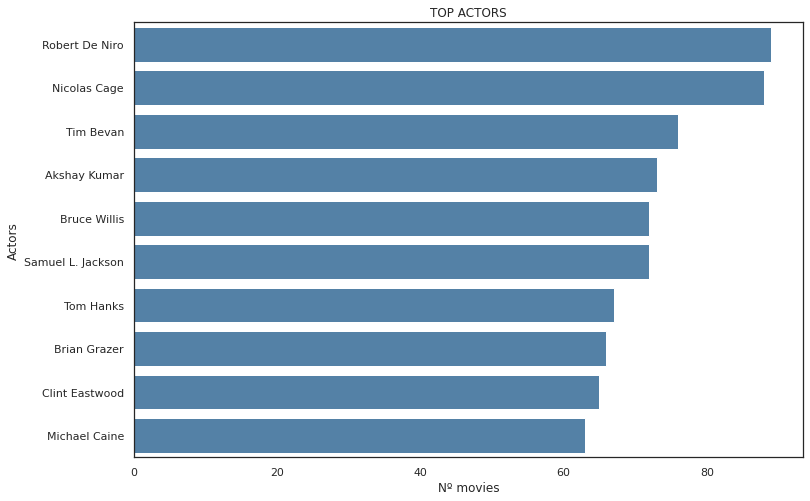

In [34]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("white")
ax = sns.barplot(data=top, y="primaryName", x="count_actors_movie", color ='steelblue')
ax.set(title = 'TOP ACTORS')
ax.set(xlabel='Nº movies', ylabel='Actors')

# ax = sns.barplot(data=top, y="primaryName", x="count_actors_movie",color="seagreen")

fig03 = ax.get_figure()
fig03.savefig("sns_titles.png", bbox_inches = "tight")

In [35]:
top 

,primaryName,count_actors_movie
19450,Robert De Niro,89
16853,Nicolas Cage,88
22537,Tim Bevan,76
474,Akshay Kumar,73
3194,Bruce Willis,72
20425,Samuel L. Jackson,72
22784,Tom Hanks,67
3054,Brian Grazer,66
4394,Clint Eastwood,65
15510,Michael Caine,63


In [ ]:
actor = str(input("Choose an actor "))
result=tp.loc[tp['primaryName'] == actor, 'count_actors_movie']
if result.empty:
  print("actor is not on the list")
else:
  print(result)

Choose an actor Brian Grazer
3056    66
Name: count_actors_movie, dtype: int64


In [36]:
condition45 = top_movies_split['primaryProfession'] == 'actress'
actress= top_movies_split[condition45][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession','titleType','startYear']]

In [40]:
condition2 = actress['titleType'] == 'movie'
condition3 = actress['titleType'] == 'short'
condition4 = actress['startYear'] <= '2022'
actress_ms = actress[condition2 | condition3 & condition4][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession','titleType','startYear']]


In [41]:
actress_ms['primaryProfession'].value_counts()

actress    590109
Name: primaryProfession, dtype: int64

In [42]:
condition4 = actress_ms['wheighted'] > actress_ms["wheighted"].mean()

t_actress = actress_ms[condition4][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession','titleType']]

actress_t = t_actress.groupby('primaryName')['tconst'].count().reset_index(name='count_actress_movie') 

top_a = actress_t.sort_values(by=('count_actress_movie'), ascending=False).head(10)


[Text(0, 0.5, 'Actresses'), Text(0.5, 0, 'Nº movies')]

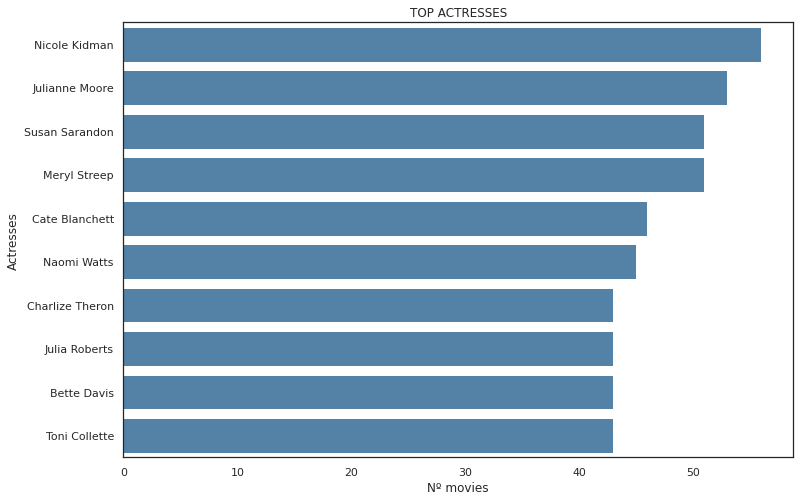

In [43]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("white")
ax2 = sns.barplot(data=top_a, y="primaryName", x="count_actress_movie", color ='steelblue')
ax2.set(title = 'TOP ACTRESSES')
ax2.set(xlabel='Nº movies', ylabel='Actresses')


In [45]:
condition4 = top_movies_split['primaryProfession'] == 'writer'
writer = top_movies_split[condition4][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession','titleType','startYear']]

In [46]:
condition4 = writer['startYear'] <= '2022'

condition2 = writer['titleType'] == 'movie'
condition3 = writer['titleType'] == 'short'
writer_ms = writer[condition2 | condition3 & condition4][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession','titleType','startYear']]

In [50]:
writer_ms['titleType'].value_counts()

movie    763521
short    256119
Name: titleType, dtype: int64

In [55]:
condition4 = writer_ms['wheighted'] > writer_ms['wheighted'].mean()
t_writer = writer_ms[condition4][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession','titleType','startYear']]

In [56]:
top_w = t_writer.groupby('primaryName')['tconst'].count().reset_index(name='count_writer_movie') 

top_w = top_w .sort_values(by=('count_writer_movie'), ascending=False).head(10)


In [57]:
top_w 

,primaryName,count_writer_movie
3015,Brian Grazer,65
24505,Woody Allen,57
24427,William Shakespeare,55
22032,Stephen King,54
11473,John Cusack,53
14367,Luc Besson,53
22489,Sylvester Stallone,51
1696,Antonio Banderas,51
225,Adam Sandler,47
6979,Ethan Hawke,47


[Text(0, 0.5, 'Writers'), Text(0.5, 0, 'Nº movies')]

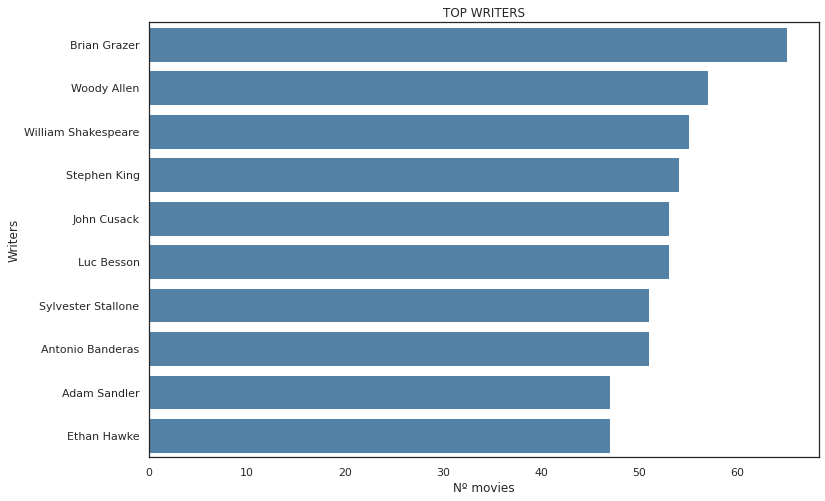

In [54]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("white")
ax3 = sns.barplot(data=top_w, y="primaryName", x="count_writer_movie", color ='steelblue')
ax3.set(title = 'TOP WRITERS')
ax3.set(xlabel='Nº movies', ylabel='Writers')

In [64]:
condition55 = top_movies_split['primaryProfession'] == 'director'
director = top_movies_split[condition55][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession','titleType','startYear']]
director['primaryProfession'].value_counts()

director    2269436
Name: primaryProfession, dtype: int64

In [66]:
condition26 = director['titleType'] == 'movie'
condition36 = director['titleType'] == 'short'
condition4 = director['startYear'] <= '2022'

director_ms = director[condition26 | condition36 & condition4][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession','titleType','startYear']]


In [67]:
director_ms['titleType'].value_counts()

movie    625471
short    247020
Name: titleType, dtype: int64

In [68]:
condition6 = director_ms['wheighted'] > director_ms["wheighted"].mean()
t_director = director_ms[condition6][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession','titleType']]

In [69]:
t_director['titleType'].value_counts()

movie    49383
short      700
Name: titleType, dtype: int64

In [70]:
director_t = t_director.groupby('primaryName')['tconst'].count().reset_index(name='count_director_movie') 

top_d = director_t.sort_values(by=('count_director_movie'), ascending=False).head(10)
top_d

,primaryName,count_director_movie
3107,Clint Eastwood,66
17129,Woody Allen,58
10014,Luc Besson,55
3526,Danny DeVito,51
11036,Mel Gibson,51
169,Aditya Chopra,49
14027,Robert Redford,48
13447,Randall Emmett,48
1259,Anurag Kashyap,46
13828,Ridley Scott,46


[Text(0, 0.5, 'Directors'), Text(0.5, 0, 'Nº movies')]

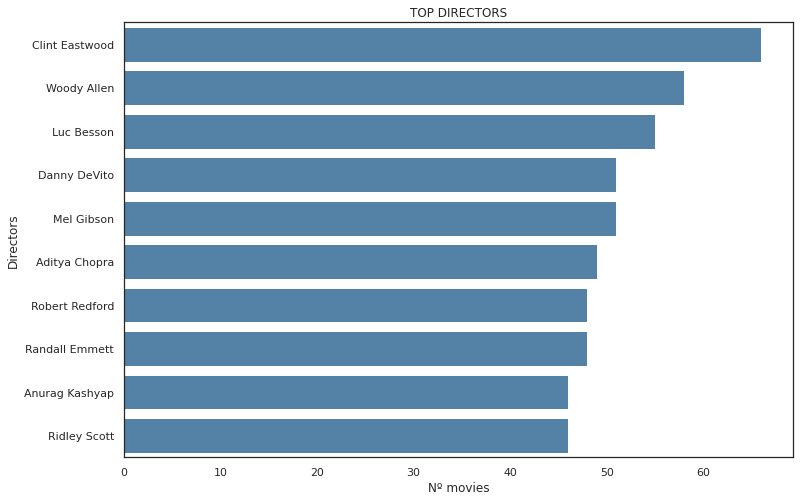

In [71]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("white")
ax4 = sns.barplot(data=top_d, y="primaryName", x="count_director_movie",color ='steelblue')
ax4.set(title = 'TOP DIRECTORS')
ax4.set(xlabel='Nº movies', ylabel='Directors')